Nome: Pedro Paulo Dantas Silva Martins

Lista 1, respostas.

**1 - (Erro de treino e erro de teste)**

Concordo com Bianca, pois o erro de treino é importante na hora de escolhermos qual método usarmos, por exemplo não queremos um modelo com $MSE_{tr}=0$ (caso de overfitting).<br>
Portanto, devemos ficar atentos tanto ao erro de treino quanto ao de teste, na hora de escolhermos o nosso modelo. (Claro que tomando todo o devido cuidado, e não usar os dados de teste para decidir o modelo e falar sobre a acurácia na prática)

**2 -  (Regressão não tão-linear)**

Criaremos a matriz do modelo, mas antes precisamos tratar os dados.

A umidade será tratada como : $max((u-10), 0)$.

A refletividade possui impacto logarítmico então o seu impacto será: $log(r)$

O vento por ser tratar de uma variável circular precisamos transformá-lo em algo que o descreva bem.<br>
(Pensando que o $0$ possui efeito contrário a 
$\pi$, e $\pi/2$ o contrário de $3\pi/2$. Uma combinação possível pra isso é: $sen(x) + cos(x)$)

Uma linha da nossa matriz de treinamento ficaria assim: $[1,\hspace{2mm}max((u-10), 0),\hspace{2mm}log(r),\hspace{2mm}sen(v),\hspace{2mm}cos(v)]$

**3 -  (Papagaios, peixes e p-valores)**

O que está acontecendo na verdade é que ao separar o experimento original em outros 100, em algum momento, ele acharia um p-valor abaixo de 0.05. O que deveria ser feito é que o máximo do p-valor deve diminuir junto com a quantidade de experimentos.

**4 - (Deslizes metodológicos)**

(iii) Ao escolher as variáveis usadas ele usa todos os dados, inclusive os de teste. O que o faz cometer um erro grave, tendo em vista que esses dados de teste não servem mais para provar a eficácia do modelo na prática.

(iv) Quando o dataset é separado dessa forma há um problema, pois por se tratar de uma doença hereditária esperamos que pessoas da mesma família tenham alta correlação. O que atrapalha completamente o teste do modelo, dessa forma é impossível de medir sua precisão real.

(v) Os hiperparâmetros não podem ser escolhidos pelo conjunto de teste, o correto seria criar um conjunto de validação. Pois, escolhendo aquele que melhor performa no teste não há como dizer como será na realidade.

**5 - (Métrica de avaliação)**

Montaremos uma matriz de confusão do nosso modelo atual. (Nosso modelo prevê se é fraude)

$\begin{matrix}
&&Classe\hspace{1mm}real&&\\
                                       &&Negative & Positive\\
Classe\hspace{1mm}estimada  & Negative & 975 & 5\\
                            & Positive & 5 & 15
\end{matrix}$

Esse é o nosso modelo atual, mas o que o banco diz é que prefere errar nos Falsos positivos do que nos Falsos negativos. Portanto, podemos diminuir o threshold para prever positivo mais vezes. Um exemplo de modelo ideal para o banco seria:

$\begin{matrix}
&&Classe\hspace{1mm}real&&\\
                                       &&Negative & Positive\\
Classe\hspace{1mm}estimada  & Negative & 965 & 0\\
                            & Positive & 15 & 20
\end{matrix}$

**6 -  (Flexibilidade do lasso)**

O lasso é um modelo que se baseia um pouco na regressão linear, mas o seu diferencial é que ele tenta zerar as variáveis que já estão próximas de 0, ou seja que possuem pouca relação com o que queremos prever.

Sabendo que a presença de mais variáveis sempre diminui ou mantém o $MSE_{TR}$, isto significa que ter mais variáveis faz com que esteja sujeito a mais overfitting. Como a quantidade de variáveis do lasso é sempre menor ou igual a quantidade de variáveis da regressão linear, ele está sujeito a menos overfitting.

Modelos mais flexíveis tendem a ter previsões melhores, por conseguirem captar melhor a relação entre a variável dependente e a independente. Em contra partida, se o modelo começa a ficar flexível demais essa relação começa a se tornar complexa demais para ser interpretada.

**7 - (Simulações e estimativas)**

a) O método usado é a regressão linear, com 2 coeficientes: $y = \beta_0 + x\beta_1$.<br>
var1 representa o coeficiente $\beta_1$; var2 representa o coeficiente $\beta_0$; var3 representa o $\hat{y}$; var4 representa o $MSE$

b) Esse modelo é muito bom para o nosso problema, tendo em vista que sabemos a relação ideal, mas a flexibilidade admitida pelo pesquisador não é o suficiente, por isso provavelmente o $MSE$ será alto.

c) var5 é um array que contém os coeficientes $\beta_0$ e $\beta_1$; var6 é um array que contém os $\hat{y}$; var7 é o novo $MSE$;
Portanto nossas variáveis são as mesmas de antes, mas com uma forma um pouco diferente.

d) Se dermos mais flexibilidade para o nosso modelo ele será melhor. Podemos fazer isso facilmente "transformando" essa regressão linear em uma regressão polinomial. Mudamos a nossa matrix xx, para uma matriz de vandermonde que vá até o terceiro grau. Com essa mudança o var 7 seria muito menor que o var4.

e) Sabe-se que inverter matrizes é muito custoso computacionalmente. Portanto poderíamos substituir a linha onde há a inversão por:<br>
var5 = np.linalg.solve(xx.T@xx, xx.T@y)

**8 -  (Comparando modelos de classificação)**

In [1]:
# Código que veio pronto
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn import preprocessing


df = pd.read_csv("./soccer.csv")
x = df.drop("target", axis=1)
y = df[["target"]]
x_train , y_train = x.iloc[:2560] , y.iloc[:2560]
x_test , y_test = x.iloc[2560:] , y.iloc[2560:]


In [2]:
x_train = x_train.drop(["home_team", "away_team"], axis=1)  # Retirando os nomes dos times das variáveis
x_test = x_test.drop(["home_team", "away_team"], axis=1)    # A previsão será feita com base nas diferenças estatísticas dos times

fator_normalizacao = preprocessing.StandardScaler().fit(x_train)   # Pretendo normalizar os dados, para isso precisamos descobrir o fator de normalização
x_train_normalizado = fator_normalizacao.transform(x_train) # Isto porque, antes de normalizar. Ficava chamando a atenção no código.
x_test_normalizado = fator_normalizacao.transform(x_test)   # Mas normalizar em si, não mudou a matriz de confusão. O que era esperado.

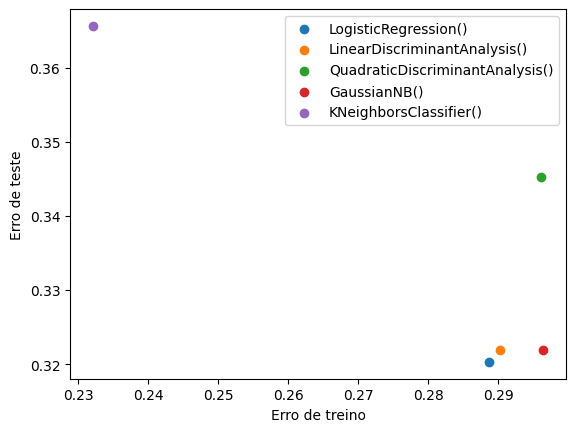

Modelo: LogisticRegression()
Matriz de confusão:
[[196  78]
 [127 239]]
acuracia = 0.6796875
precision = 0.6530054644808743
recall = 0.7539432176656151
F1-score = 0.6998535871156661
Modelo: LinearDiscriminantAnalysis()
Matriz de confusão:
[[197  80]
 [126 237]]
acuracia = 0.678125
precision = 0.6528925619834711
recall = 0.7476340694006309
F1-score = 0.6970588235294118
Modelo: QuadraticDiscriminantAnalysis()
Matriz de confusão:
[[168  66]
 [155 251]]
acuracia = 0.6546875
precision = 0.6182266009852216
recall = 0.7917981072555205
F1-score = 0.69432918395574
Modelo: GaussianNB()
Matriz de confusão:
[[206  89]
 [117 228]]
acuracia = 0.678125
precision = 0.6608695652173913
recall = 0.7192429022082019
F1-score = 0.688821752265861
Modelo: KNeighborsClassifier()
Matriz de confusão:
[[184  95]
 [139 222]]
acuracia = 0.634375
precision = 0.6149584487534626
recall = 0.7003154574132492
F1-score = 0.6548672566371682


In [3]:
import numpy as np

def confusion(y_predict, y):
    """Recebe os parâmetros y verdadeiro, e o y estimado, e faz a matriz de confusão.
    [[TN, FN],
     [FP, TP]]
     Também calcula e retorna a taxa de erro."""
    negatives = [0, 0]
    positives = [0, 0]
    for y_p, y_t in zip(y_predict, y['target']):    # Loop responsável por adicionar 1 nos elementos da matriz de confusão
        if  y_p == 0:
            if y_p == y_t:
                negatives[0] += 1
            
            if y_p != y_t:
                negatives[1] += 1
        
        if y_p == 1:
            if y_p != y_t:
                positives[0] += 1
            
            if y_p == y_t:
                positives[1] += 1

    matrix = np.array([negatives, positives])
    
    total = np.sum(negatives + positives)   # Soma de todos os casos
    erros = np.sum(negatives[1] + positives[0]) # Soma de todos os erros
    tax_erro = erros/total

    return matrix, tax_erro

modelos = [LR(), LDA(), QDA(), NB(), kNN()] # Lista com todos os modelos
erros_treinos = []
erros_testes = []
matriz_confusion_teste = []

for modelo in modelos:
    modelo_treinado = modelo.fit(x_train_normalizado, y_train['target'])    # Treinando com o modelo da vez.

    y_train_predict = modelo_treinado.predict(x_train_normalizado)  # Estimando os Y de treino
    y_test_predict = modelo_treinado.predict(x_test_normalizado)    # Estimando os Y de teste

    _, erro_treino = confusion(y_train_predict, y_train)    # taxa de erro do treino
    matriz_confusion, erro_teste = confusion(y_test_predict, y_test)   # taxa de erro do teste

    erros_treinos.append(erro_treino)   # Adicionando todas as taxas de erro de treino a uma lista
    erros_testes.append(erro_teste)     # Adicionando todas as taxas de erro de teste a uma lista

    matriz_confusion_teste.append(matriz_confusion) # Adiciona todas as matrizes de confusão a uma lista

for i in range(len(modelos)):
    plt.scatter(erros_treinos[i], erros_testes[i], label=f'{modelos[i]}')

plt.xlabel('Erro de treino')
plt.ylabel('Erro de teste')
plt.legend()
plt.show()

for i, matriz in enumerate(matriz_confusion_teste):
    TN = matriz[0][0]
    FN = matriz[0][1]
    TP = matriz[1][1]
    FP = matriz[1][0]

    acuracia = (TN + TP)/(TN + TP + FN + FP)
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    F1 = (2*precision*recall)/(precision + recall)

    print(f'Modelo: {modelos[i]}')
    print(f'Matriz de confusão:\n{matriz}')
    print(f'acuracia = {acuracia}')
    print(f'precision = {precision}')
    print(f'recall = {recall}')
    print(f'F1-score = {F1}')

    print('='*50)

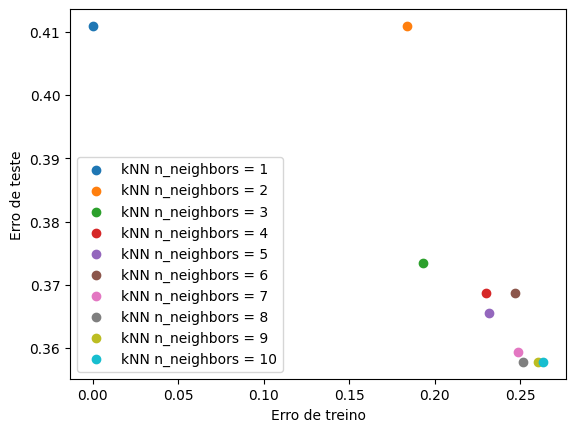

In [4]:
ks = range(1, 11) # Lista com todos os modelos
erros_treinos = []
erros_testes = []
matriz_confusion_teste = []

for k in ks:
    kNN_treinado = kNN(n_neighbors=k).fit(x_train_normalizado, y_train['target'])    # Treinando o kNN com k vizinhos

    y_train_predict = kNN_treinado.predict(x_train_normalizado)  # Estimando os Y de treino
    y_test_predict = kNN_treinado.predict(x_test_normalizado)    # Estimando os Y de teste

    _, erro_treino = confusion(y_train_predict, y_train)    # taxa de erro do treino
    matriz_confusion, erro_teste = confusion(y_test_predict, y_test)   # taxa de erro do teste

    erros_treinos.append(erro_treino)   # Adicionando todas as taxas de erro de treino a uma lista
    erros_testes.append(erro_teste)     # Adicionando todas as taxas de erro de teste a uma lista

    matriz_confusion_teste.append(matriz_confusion) # Adiciona todas as matrizes de confusão a uma lista

for i in ks:
    plt.scatter(erros_treinos[i-1], erros_testes[i-1], label=f'kNN n_neighbors = {i}')

plt.xlabel('Erro de treino')
plt.ylabel('Erro de teste')
plt.legend()
plt.show()


**9 - (Seleção de variáveis e lasso)**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn import preprocessing


bodyfat = pd.read_csv("./bodyfat.csv")
X = bodyfat.drop(columns =["BodyFat","Density"])
y = bodyfat["BodyFat"]
X_train , X_test , y_train , y_test = train_test_split (X, y, test_size =0.2 , random_state = 10)

In [3]:
fator_normalizacao = preprocessing.StandardScaler().fit(X_train)   # Normalização dos dados, isto porque existem algumas unidades distintas.
x_train_normalizado = fator_normalizacao.transform(X_train)
x_test_normalizado = fator_normalizacao.transform(X_test)

**10 - (Regressão linear com resíduos correlacionados e heteroscedasticidade)**

a) Sabemos que $\Sigma$ é a matriz das variâncias. O fato de serem resíduos não-correlacionados afeta matriz de tal forma que ela se torna uma matriz diagonal. E a homoscedasticidade faz com que todos os elementos dessa diagonal sejam iguais.

b)<br>
*(b-i)* $\hat{\beta_{\Sigma}} = argmin_{\beta} (y - X\beta)^{T}\Sigma^{-1}(y - X\beta)$<br>
Precisamos derivar e igualar a 0. Para facilitar as contas, transformarei tudo em produto interno e depois derivo.<br>
$<(y - X\beta),\Sigma^{-1}y - \Sigma^{-1}X\beta> = $<br>
$<y, \Sigma^{-1}y> - <y, \Sigma^{-1}X\beta> -<X\beta, \Sigma^{-1}y> + <X\beta, \Sigma^{-1}X\beta>$<br>
Derivando e igualando a 0(Lembrando que $\Sigma$ é positivo definida):<br>
$- X^{T}\Sigma^{-1}y - X^{T}\Sigma^{-1}y + 2X^{T}\Sigma^{-1}X\hat{\beta_{\Sigma}} = 0$<br>
$X^{T}\Sigma^{-1}X\hat{\beta_{\Sigma}} = X^{T}\Sigma^{-1}y$<br>
$\hat{\beta_{\Sigma}} = (X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1}y$


*(b-ii)* $\mathbb{E}(\hat{\beta_{\Sigma}}) = \beta$ ;(Como consideramos X constante nossas contas serão facilitadas.)<br>
$y = X\beta + \epsilon$; $\mathbb{E}(\epsilon) = 0$

$\mathbb{E}(\hat{\beta_{\Sigma}}) = \mathbb{E}((X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1}(X\beta + \epsilon))$<br>
$\mathbb{E}(\hat{\beta_{\Sigma}}) = (X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1}(\mathbb{E}(X\beta) + \mathbb{E}(\epsilon))$<br>
$\mathbb{E}(\hat{\beta_{\Sigma}}) = (X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1}X\beta$<br>
$\mathbb{E}(\hat{\beta_{\Sigma}}) = \beta$

*(b-iii)* $\mathbb{V}[\hat{\beta_{\Sigma}}|X] = (X^{T}\Sigma^{-1}X)^{-1}$<br>
Usaremos as propriedades:<br> 
$\mathbb{V}(Ay) = A\mathbb{V}(y)A^{T}$<br>
$\mathbb{V}[y] = \mathbb{V}[X\beta + \epsilon] = \mathbb{V}[\epsilon] = \Sigma$

$\mathbb{V}[\hat{\beta_{\Sigma}}] = \mathbb{V}[(X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1}y] = ((X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1})\mathbb{V}[y]((X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1})^{T} =$<br>
$=  ((X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1})\Sigma((X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1})^{T} = (X^{T}\Sigma^{-1}X)^{-1}(X^{T}\Sigma^{-1}X)(X^{T}\Sigma^{-1}X)^{-1}=$<br>
= $(X^{T}\Sigma^{-1}X)^{-1}$


*(b-iv)* Se a distribuição de $\epsilon$ é normal com essas medidas, claramente $\hat{\beta}_{\Sigma}$ também será normal, isto porque $\epsilon$ é a única variável aleatória que tem relação com $\hat{\beta}_{\Sigma}$. E as questões acima já provaram a Esperança e a variância.

c)<br>
*(c-i)* $\hat{\beta}_{\Sigma} = argmin_{\beta} \sum\limits_{i=1}^n w_i^2(y_i - \beta_0 - \sum\limits_{j=1}^p \beta_i x_{ij})^2$<br>
Essa é apenas uma forma não matricial de escrevermos o beta, sabendo da não-correlação dos dados. Portanto apenas iremos abrir os produtos matriciais.<br>
$\hat{\beta_{\Sigma}} = argmin_{\beta} (y - X\beta)^{T}\Sigma^{-1}(y - X\beta)$<br>
$\hat{\beta_{\Sigma}} = argmin_{\beta} \sum\limits_{i=1}^n (y_i - [X\beta]_i)^{T}\Sigma^{-1}_i(y_i - [X\beta]_i)$ onde os i representam a i-ésima componente da matriz. Como $\Sigma$ é diagonal, sua inversa sera apenas inverter seus valores. E a i-ésima componente do vetor $X\beta$ é dado por $\sum\limits_{j=1}^p \beta_i x_{ij}$. (Esse $\beta_0$ sai do somatório por conta da primeira linha de X ser coeficientes constantes.) Por ter se transformado em números, a ordem não altera o produto. E um número transposto é ele mesmo. Portanto:<br>
$\hat{\beta}_{\Sigma} = argmin_{\beta} \sum\limits_{i=1}^n w_i^2(y_i - \beta_0 - \sum\limits_{j=1}^p \beta_i x_{ij})^2$ onde $w_i^2 = \frac{1}{\sigma_i^2}$

*(c-ii)* É interessante pensar nisso como pesos. Por que assim é como se o modelo penalizasse aqueles coeficientes que possuem alta variância.

*(c-iii)* Partindo do que já temos é simples, sabemos que: $\hat{\beta}_{\Sigma} = argmin_{\beta} \sum\limits_{i=1}^n w_i^2(y_i - \beta_0 - \sum\limits_{j=1}^p \beta_i x_{ij})^2$<br>
E podemos reescrever facilmente como: $\hat{\beta}_{\Sigma} = argmin_{\beta} \sum\limits_{i=1}^n (w_iy_i - w_i\beta_0 - \sum\limits_{j=1}^p \beta_i x_{ij}w_i)^2$<br>
Claramente que $w_i y_i$ representa uma linha de um vetor que é dado por: $\tilde{y} = \Sigma^{-\frac{1}{2}}y$<br>
E o mesmo acontece com $x_{ij} w_i$ que representa um elementa da linha i e coluna j da matriz que é dada por: $\tilde{X} = \Sigma^{-\frac{1}{2}}X$<br>
Portanto: $\hat{\beta}_{\Sigma} = argmin_{\beta} \sum\limits_{i=1}^n (\tilde{y_i} - \beta_0 - \sum\limits_{j=1}^p \beta_i \tilde{x_{ij}})^2$
